# Face Story: Comic Style Transformation with Amazon Nova Canvas

**<i>Written by jesamkim@</i>**

**This content is based on AWS Summit Seoul 2025 Expo: ComicAI Studio - Face Story** 

## 3-Step Process
1. **Generate Korean Face Realistic Image** - Create high-quality realistic image with Nova Canvas (Originally took a photo of the user's face)
2. **Convert to Black & White Comic Style** - Transform realistic image to B&W comic style
3. **Add Color Expression** - Apply colors based on B&W comic foundation

## Nova Canvas Best Practices Applied
- **Image Caption Style Prompts**: Written as image descriptions, not commands
- **Specific Elements Included**: Subject, Action, Environment, Lighting, Style, Camera Position
- **1024 Character Limit**: Important content placed at the beginning
- **No Negation Words**: Use negativeText parameter instead
- **Seed Value Management**: Consistent reproducible results

## Before You Start

1. **AWS Credentials Setup**: Configure AWS credentials using `aws configure` command
2. **Bedrock Model Access**: Request and get approval for Amazon Nova Canvas model access in AWS Console > Amazon Bedrock > Model access
3. **Region**: Nova Canvas is working in `us-east-1` region in this code.

In [1]:
# Install Required Packages
# Uncomment and run the following if this is your first time running this notebook!

import sys
import subprocess

def install_packages():
    """Automatically install required packages"""
    packages = [
        'boto3>=1.34.0',
        'botocore>=1.34.0', 
        'Pillow>=9.0.0',
        'matplotlib>=3.5.0',
        'numpy>=1.21.0'
    ]
    
    print("📦 Installing required packages...")
    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package}: {e}")
    
    print("\n🎉 Package installation complete! Run the next cell.")

# Uncomment the line below if you need to install packages
# install_packages()

print("💡 Uncomment the installation code above if you need to install packages!")
print("💡 AWS credentials and Bedrock model access are also required.")

💡 Uncomment the installation code above if you need to install packages!
💡 AWS credentials and Bedrock model access are also required.


In [2]:
# Environment Setup and Library Imports
import boto3
import json
import base64
import io
import random
import time
from datetime import datetime
from botocore.config import Config
from botocore.exceptions import ClientError
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# AWS Configuration
BEDROCK_REGION = "us-east-1"
bedrock_runtime = boto3.client(
    'bedrock-runtime', 
    region_name=BEDROCK_REGION,
    config=Config(read_timeout=300)
)

print("✅ Environment setup complete!")
print(f"📍 Using region: {BEDROCK_REGION}")
print("🎨 Ready for 3-step comic transformation process!")

✅ Environment setup complete!
📍 Using region: us-east-1
🎨 Ready for 3-step comic transformation process!


## Step 1: Generate Young Korean Face Realistic Image

High-quality realistic image generation applying Nova Canvas Best Practices:
- **Image Caption Style**: Written as image descriptions, not commands
- **Specific Elements**: Subject, Environment, Lighting, Style, Camera Position included
- **No Negation Words**: Use negativeText parameter for exclusions

🚀 Starting Step 1: Face image Generation
🎨 Step 1: Generating Face realistic image...
📝 Prompt length: 502 characters (limit: 1024)
✅ Step 1 Complete: Face realistic image generated!


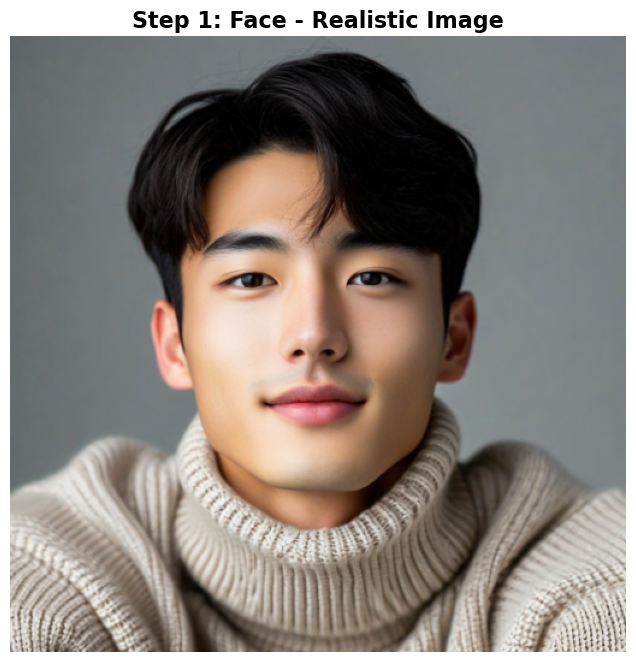

💾 Step 1 saved: step1_young_korean_realistic_20250703_061810.png


In [3]:
# Step 1: Face Realistic Image Generation
def generate_young_korean_face():
    """Generate young Korean face realistic image using Nova Canvas best practices"""
    
    # Nova Canvas Best Practice: Image caption style prompt with specific elements
    # Subject + Environment + Lighting + Style + Camera Position (under 1024 chars)
    realistic_face_prompt = """
Professional headshot portrait of a young Korean person in their early twenties, 
clean natural facial features, gentle expression with slight smile, 
wearing a cozy winter turtleneck sweater in neutral color, 
sitting in modern studio setting with neutral gray background, 
soft natural lighting from front with subtle rim lighting, 
high-resolution digital photography style, 
shot with 85mm lens at eye level, shallow depth of field, 
crisp focus on face, professional commercial photography quality
    """.strip()
    
    # Nova Canvas Best Practice: Use negativeText instead of negation words in prompt
    negative_prompt = """
blurry, low resolution, bad quality, distorted features, multiple faces, 
cartoon, anime, illustration, painting, sketch, artificial lighting, 
harsh shadows, overexposed, underexposed, noise, grain, 
old person, elderly, wrinkles, facial hair, glasses, accessories
    """.strip()
    
    # Generate with consistent seed for reproducibility
    seed = 12345  # Fixed seed for consistent results
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": realistic_face_prompt,
            "negativeText": negative_prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 7.0,  # Balanced guidance scale
            "seed": seed,
            "quality": "standard"
        }
    }
    
    try:
        print("🎨 Step 1: Generating Face realistic image...")
        print(f"📝 Prompt length: {len(realistic_face_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print("✅ Step 1 Complete: Face realistic image generated!")
            return image_data, base64_image
        else:
            print("❌ Step 1 Failed: Image generation failed")
            return None, None
            
    except Exception as e:
        print(f"❌ Step 1 Error: {str(e)}")
        return None, None

# Execute Step 1
print("🚀 Starting Step 1: Face image Generation")
step1_image_data, step1_image_b64 = generate_young_korean_face()

if step1_image_data:
    step1_image = Image.open(io.BytesIO(step1_image_data))
    plt.figure(figsize=(8, 8))
    plt.imshow(step1_image)
    plt.title("Step 1: Face - Realistic Image", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Save Step 1 result
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    step1_filename = f"step1_young_korean_realistic_{timestamp}.png"
    step1_image.save(step1_filename)
    print(f"💾 Step 1 saved: {step1_filename}")
else:
    print("❌ Step 1 failed - cannot proceed to next steps")

## Step 2: Convert to Black & White Comic Style

Transform realistic image to black and white comic style:
- **Conditional Image Generation**: Use Step 1 image as conditionImage
- **Comic Style Emphasis**: Black & white, line art, cartoon features
- **Korean Comic Style**: Webtoon and manhwa style application


🚀 Starting Step 2: Black and White Comic Style Conversion
🎨 Step 2: Converting to black and white comic style...
📝 Prompt length: 546 characters (limit: 1024)
✅ Step 2 Complete: Black and white comic style conversion done!


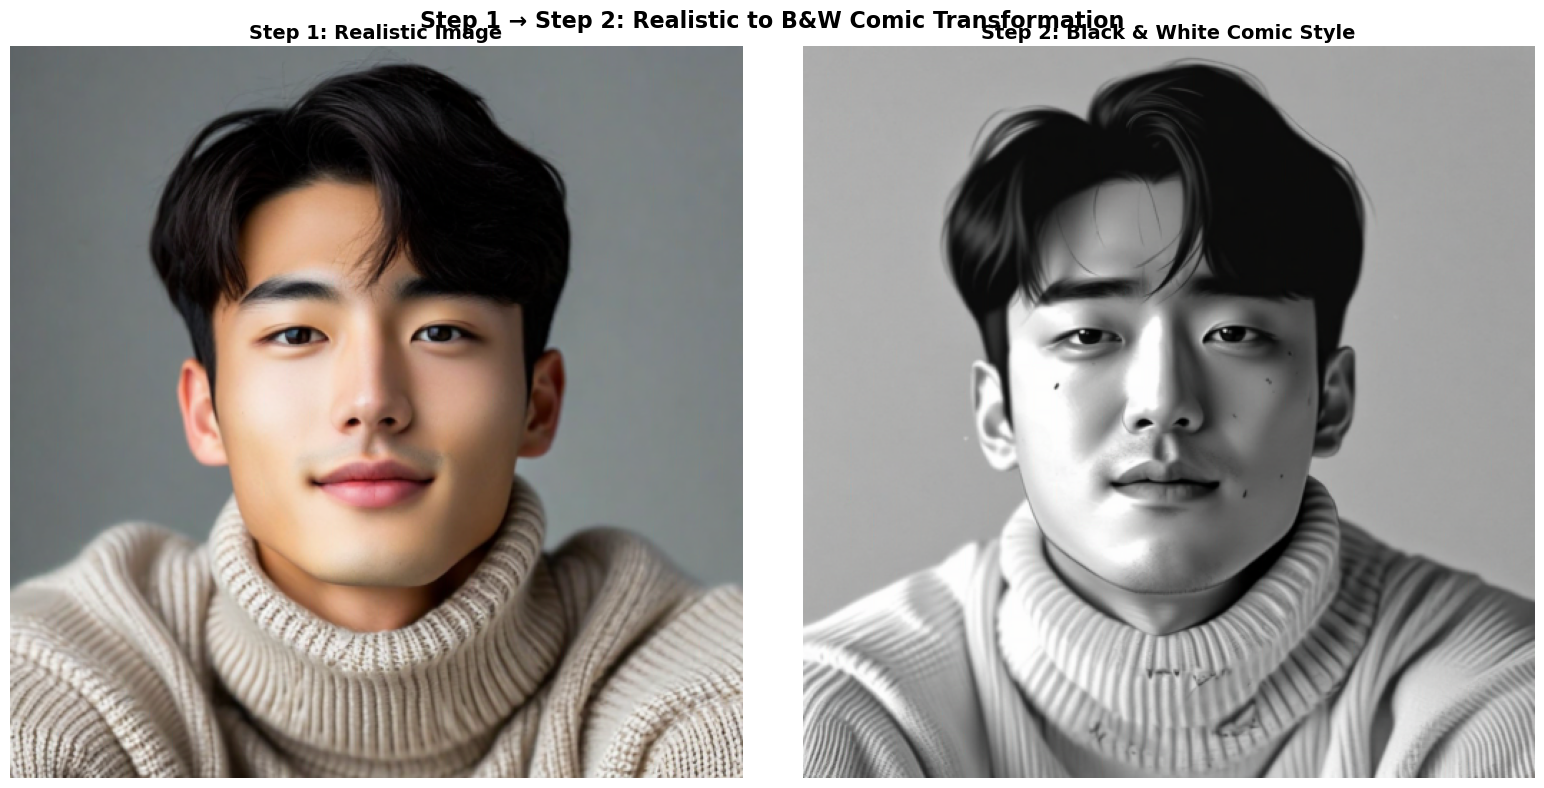

💾 Step 2 saved: step2_bw_comic_20250703_061810.png


In [4]:
# Step 2: Convert to Black and White Comic Style
def convert_to_bw_comic_style(input_image_b64):
    """Convert realistic image to black and white comic style"""
    
    # Nova Canvas Best Practice: Detailed image caption for comic transformation
    bw_comic_prompt = """
Black and white comic book illustration style portrait, 
Korean manhwa webtoon art style, clean line art drawing, 
bold black outlines with varying line weights, 
high contrast monochrome shading using only black and white, 
cel-shading technique with flat tonal areas, 
simplified facial features with cartoon proportions, 
expressive eyes with detailed eyelashes, 
clean geometric face structure, dramatic lighting with stark shadows, 
professional comic book illustration, graphic novel art style, 
pen and ink drawing technique, no gray tones
    """.strip()
    
    # Negative prompt for unwanted elements
    negative_prompt = """
realistic photo, photographic, colored, color, grayscale, gray tones, 
soft shading, gradient shading, realistic skin texture, 
detailed skin pores, photorealistic lighting, 
blurry lines, sketchy lines, rough drawing, 
watercolor, painting, oil painting, digital painting
    """.strip()
    
    seed = 23456  # Different seed for variation
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": bw_comic_prompt,
            "negativeText": negative_prompt,
            "conditionImage": input_image_b64  # Use Step 1 image as condition
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 8.5,  # Higher guidance for stronger style transformation
            "seed": seed
        }
    }
    
    try:
        print("🎨 Step 2: Converting to black and white comic style...")
        print(f"📝 Prompt length: {len(bw_comic_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print("✅ Step 2 Complete: Black and white comic style conversion done!")
            return image_data, base64_image
        else:
            print("❌ Step 2 Failed: Comic style conversion failed")
            return None, None
            
    except Exception as e:
        print(f"❌ Step 2 Error: {str(e)}")
        return None, None

# Execute Step 2 (only if Step 1 succeeded)
if step1_image_b64:
    print("\n🚀 Starting Step 2: Black and White Comic Style Conversion")
    step2_image_data, step2_image_b64 = convert_to_bw_comic_style(step1_image_b64)
    
    if step2_image_data:
        step2_image = Image.open(io.BytesIO(step2_image_data))
        
        # Display Step 1 and Step 2 comparison
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
        axes[0].imshow(step1_image)
        axes[0].set_title("Step 1: Realistic Image", fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(step2_image)
        axes[1].set_title("Step 2: Black & White Comic Style", fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.suptitle("Step 1 → Step 2: Realistic to B&W Comic Transformation", 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Save Step 2 result
        step2_filename = f"step2_bw_comic_{timestamp}.png"
        step2_image.save(step2_filename)
        print(f"💾 Step 2 saved: {step2_filename}")
    else:
        print("❌ Step 2 failed - cannot proceed to Step 3")
else:
    print("❌ Step 1 failed - skipping Step 2")

## Step 3: Add Color Expression

Add colors based on black and white comic style:
- **Conditional Colorization**: Add colors based on Step 2 B&W image
- **Hur Young-man Style**: Apply Korean cartoonist Hur Young-man's unique color palette
- **Comic Coloring**: Flat colors and cel-shading techniques


🚀 Starting Step 3: Color Expression Addition

🎨 Generating vibrant color style...
🎨 Step 3: Adding Vibrant Retro color expression...
📝 Prompt length: 446 characters (limit: 1024)
✅ Step 3 Complete: Vibrant Retro color expression added!
💾 Step 3 Vibrant Retro saved: step3_colored_vibrant_20250703_061810.png

🎨 Generating warm color style...
🎨 Step 3: Adding Warm Earth color expression...
📝 Prompt length: 391 characters (limit: 1024)
✅ Step 3 Complete: Warm Earth color expression added!
💾 Step 3 Warm Earth saved: step3_colored_warm_20250703_061810.png

🎨 Generating cool color style...
🎨 Step 3: Adding Cool Modern color expression...
📝 Prompt length: 387 characters (limit: 1024)
✅ Step 3 Complete: Cool Modern color expression added!
💾 Step 3 Cool Modern saved: step3_colored_cool_20250703_061810.png


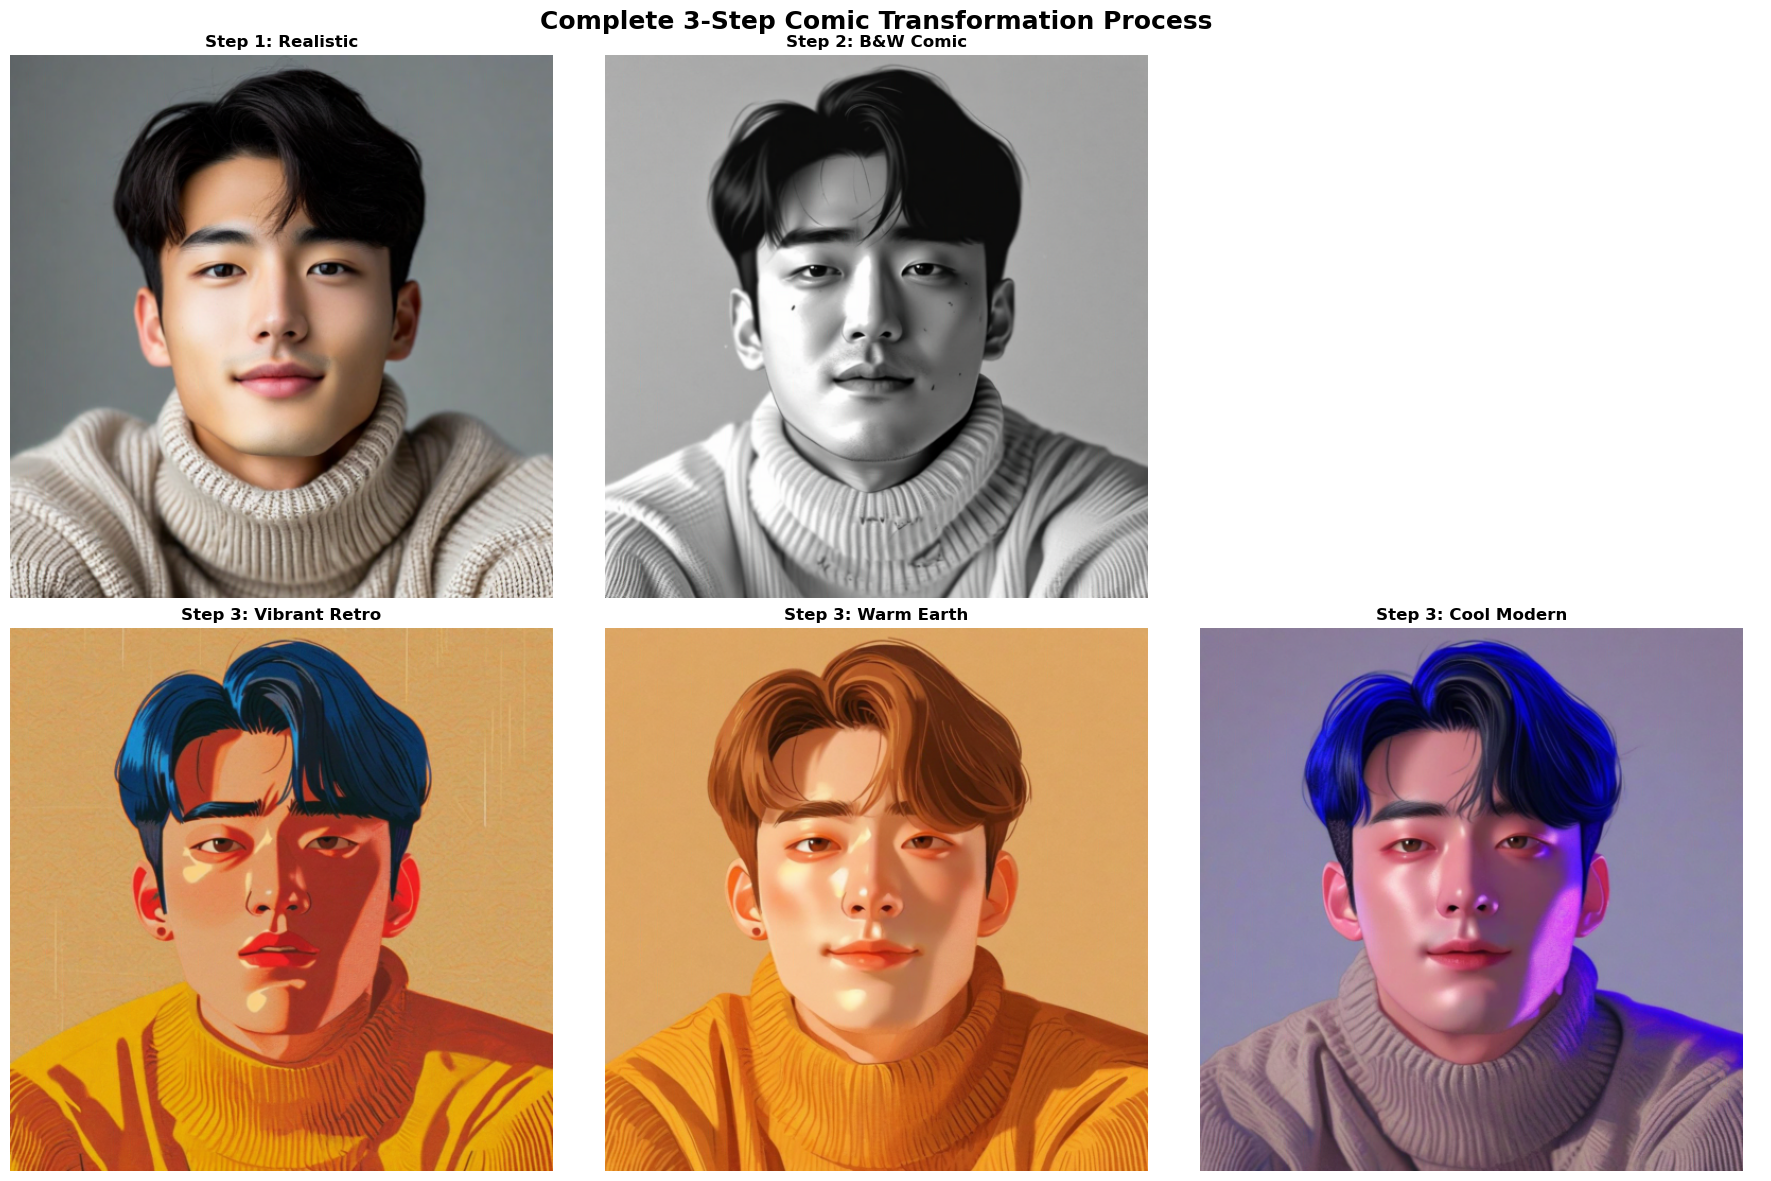


🎉 All 3 steps completed successfully!
📁 Generated 3 colored variations


In [5]:
# Step 3: Add Color Expression to B&W Comic
def add_color_to_bw_comic(bw_comic_image_b64, color_style="vibrant"):
    """Add color expression to black and white comic style image"""
    
    # Multiple color style options inspired by Hur Young-man
    color_styles = {
        "vibrant": {
            "prompt": """
Colorized Korean manhwa comic book illustration, 
vibrant color palette with warm skin tones in peachy beige, 
rich black hair with blue-black highlights, 
bright expressive eyes in dark brown, 
clean flat color fills with cel-shading technique, 
bold primary colors: red, blue, yellow accents, 
high contrast color scheme, 
retro comic book coloring style, 
screen printing poster effect, 
maintaining strong black outlines from original drawing
            """.strip(),
            "name": "Vibrant Retro"
        },
        "warm": {
            "prompt": """
Warm-toned Korean webtoon style colored illustration, 
natural warm skin tones in golden beige, 
soft brown hair with warm highlights, 
gentle brown eyes with warm reflections, 
earth tone color palette: browns, oranges, warm yellows, 
soft cel-shading with subtle gradients, 
cozy and friendly atmosphere, 
maintaining comic book line art structure, 
professional webtoon coloring technique
            """.strip(),
            "name": "Warm Earth"
        },
        "cool": {
            "prompt": """
Cool-toned Korean manhwa style colored portrait, 
cool skin tones with subtle pink undertones, 
deep black hair with cool blue highlights, 
striking dark eyes with cool reflections, 
cool color palette: blues, purples, cool grays, 
dramatic cel-shading with strong contrasts, 
modern digital comic coloring style, 
maintaining bold black line art foundation, 
sophisticated color harmony
            """.strip(),
            "name": "Cool Modern"
        }
    }
    
    selected_style = color_styles.get(color_style, color_styles["vibrant"])
    color_prompt = selected_style["prompt"]
    style_name = selected_style["name"]
    
    # Negative prompt for color step
    negative_prompt = """
black and white, monochrome, grayscale, 
muddy colors, dull colors, oversaturated, 
realistic photo coloring, photographic lighting, 
soft gradients, airbrush effect, 
blurry colors, color bleeding, 
watercolor, oil painting effect
    """.strip()
    
    seed = 34567  # Different seed for color variation
    
    request_body = {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": color_prompt,
            "negativeText": negative_prompt,
            "conditionImage": bw_comic_image_b64  # Use Step 2 B&W comic as condition
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 512,
            "width": 512,
            "cfgScale": 8.0,  # Balanced guidance for color application
            "seed": seed
        }
    }
    
    try:
        print(f"🎨 Step 3: Adding {style_name} color expression...")
        print(f"📝 Prompt length: {len(color_prompt)} characters (limit: 1024)")
        
        response = bedrock_runtime.invoke_model(
            modelId="amazon.nova-canvas-v1:0",
            body=json.dumps(request_body),
            accept="application/json",
            contentType="application/json"
        )
        
        response_body = json.loads(response['body'].read())
        
        if 'images' in response_body and response_body['images']:
            base64_image = response_body['images'][0]
            image_data = base64.b64decode(base64_image)
            
            print(f"✅ Step 3 Complete: {style_name} color expression added!")
            return image_data, base64_image, style_name
        else:
            print("❌ Step 3 Failed: Color expression failed")
            return None, None, None
            
    except Exception as e:
        print(f"❌ Step 3 Error: {str(e)}")
        return None, None, None

# Execute Step 3 (only if Step 2 succeeded)
if 'step2_image_b64' in locals() and step2_image_b64:
    print("\n🚀 Starting Step 3: Color Expression Addition")
    
    # Generate all three color styles
    color_results = []
    for style in ["vibrant", "warm", "cool"]:
        print(f"\n🎨 Generating {style} color style...")
        step3_image_data, step3_image_b64, style_name = add_color_to_bw_comic(step2_image_b64, style)
        
        if step3_image_data:
            step3_image = Image.open(io.BytesIO(step3_image_data))
            color_results.append((step3_image, style_name, step3_image_data))
            
            # Save individual result
            step3_filename = f"step3_colored_{style}_{timestamp}.png"
            step3_image.save(step3_filename)
            print(f"💾 Step 3 {style_name} saved: {step3_filename}")
    
    # Display all results if any succeeded
    if color_results:
        num_results = len(color_results)
        fig, axes = plt.subplots(2, max(2, num_results), figsize=(6 * max(2, num_results), 12))
        
        # First row: Step 1 and Step 2
        axes[0, 0].imshow(step1_image)
        axes[0, 0].set_title("Step 1: Realistic", fontsize=12, fontweight='bold')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(step2_image)
        axes[0, 1].set_title("Step 2: B&W Comic", fontsize=12, fontweight='bold')
        axes[0, 1].axis('off')
        
        # Hide unused cells in first row
        for i in range(2, max(2, num_results)):
            axes[0, i].axis('off')
        
        # Second row: Step 3 color variations
        for i, (colored_image, style_name, _) in enumerate(color_results):
            axes[1, i].imshow(colored_image)
            axes[1, i].set_title(f"Step 3: {style_name}", fontsize=12, fontweight='bold')
            axes[1, i].axis('off')
        
        # Hide unused cells in second row
        for i in range(len(color_results), max(2, num_results)):
            axes[1, i].axis('off')
        
        plt.suptitle("Complete 3-Step Comic Transformation Process", 
                    fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"\n🎉 All 3 steps completed successfully!")
        print(f"📁 Generated {len(color_results)} colored variations")
    else:
        print("❌ Step 3 failed for all color styles")
else:
    print("❌ Step 2 failed - skipping Step 3")

## 🎉 3-Step Process Complete!

### Process Summary
1. **Step 1**: Generate Face realistic image 
2. **Step 2**: Convert realistic image to black & white comic style 
3. **Step 3**: Apply 3 different color styles to B&W comic 


### Nova Canvas Best Practices Applied

#### Prompt Optimization
- **Image Caption Style**: Written as image descriptions, not commands
- **Specific Elements Included**: Subject, Action, Environment, Lighting, Style, Camera Position
- **1024 Character Limit Compliance**: All prompts written within the limit
- **Important Information First**: Core content placed at the beginning of prompts

#### Negation Handling
- **negativeText Parameter Usage**: No negation words used in prompts
- **Clear Exclusion Specification**: Unwanted styles and features specified in negativeText

#### Conditional Image Generation
- **conditionImage Utilization**: Previous step results used as input for next steps
- **Consistent Transformation**: Connected transformation process across steps

#### Parameter Optimization
- **Appropriate CFG Scale**: Optimized guidance scale for each step
- **Seed Value Management**: Fixed seeds for reproducible results
- **Resolution Optimization**: Standard 512x512 resolution used


### Usage Tips

1. **Prompt Modification**: Modify prompts in each step to try different styles
2. **Seed Value Changes**: Use different seed values to generate variations
3. **CFG Scale Adjustment**: Adjust for stronger or weaker style application
4. **Color Style Addition**: Add new color palettes as needed


### Technical Specifications

- **Model**: Amazon Nova Canvas v1.0
- **Region**: us-east-1 (required for Nova Canvas)
- **Image Resolution**: 512x512 pixels
- **Output Format**: PNG files
- **Processing Time**: ~30-60 seconds per step


### Color Style Details

1. **Vibrant Retro**: Bold primary colors with high contrast, retro comic book style
2. **Warm Earth**: Natural warm tones with browns, oranges, and warm yellows
3. **Cool Modern**: Cool blues and purples with sophisticated color harmony


This notebook demonstrates the power of Nova Canvas when combined with proper prompt engineering techniques!